In [1]:
%pylab inline
import IPython

Populating the interactive namespace from numpy and matplotlib


#Bolshoi data in CosmoSim

In [2]:
IPython.display.VimeoVideo(21866269)

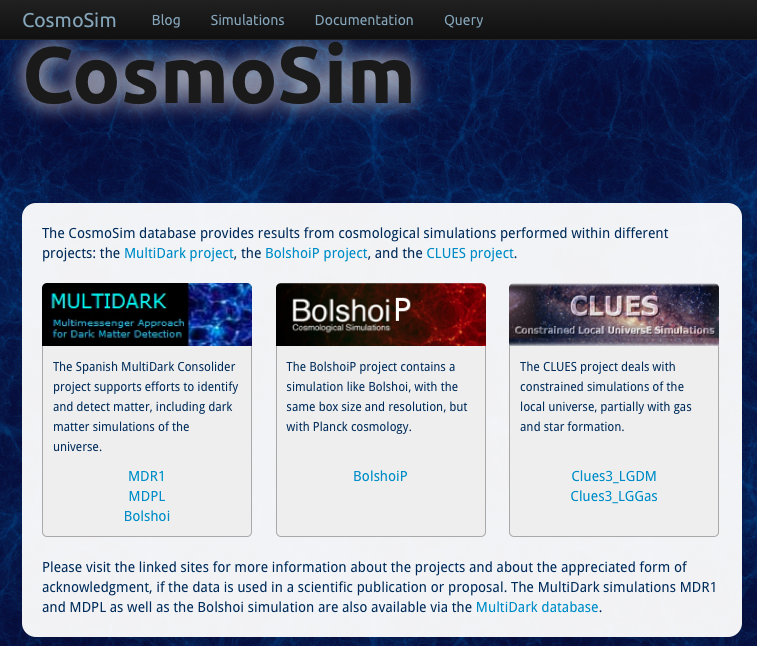

In [3]:
IPython.display.Image("img/cosmosim.png")

In [4]:
from astroquery.cosmosim import CosmoSim

In [6]:
CS = CosmoSim()

In [7]:
CS.login(username="forero",store_password=True)

Authenticating forero on www.cosmosim.org...
Authentication successful!


<Response [200]>

In [8]:
CS.check_login_status()

Status: You are logged in as forero.


In [9]:
sql_query="SELECT DISTINCT * FROM Bolshoi.Redshifts ORDER BY snapnum DESC"

In [10]:
job_id = CS.run_sql_query(query_string=sql_query)

Job created: 364989887366449


In [11]:
data = CS.download(jobid=job_id,format='csv')

In [12]:
header = data[0]
data_points = array(data[1])
print header
for line in data_points:
    print line

['row_id', 'Bolshoi__Redshifts__snapnum', 'Bolshoi__Redshifts__aexp', 'Bolshoi__Redshifts__zred']
[   1.  416.    1.    0.]
[  2.00000000e+00   4.15000000e+02   9.97350000e-01   2.65700000e-03]
[  3.00000000e+00   4.14000000e+02   9.94350000e-01   5.68200000e-03]
[  4.00000000e+00   4.13000000e+02   9.91350000e-01   8.72500000e-03]
[  5.00000000e+00   4.12000000e+02   9.88350000e-01   1.17870000e-02]
[  6.00000000e+00   4.11000000e+02   9.85350000e-01   1.48680000e-02]
[  7.00000000e+00   4.10000000e+02   9.82350000e-01   1.79670000e-02]
[  8.00000000e+00   4.09000000e+02   9.79350000e-01   2.10850000e-02]
[  9.00000000e+00   4.08000000e+02   9.76350000e-01   2.42230000e-02]
[  1.00000000e+01   4.07000000e+02   9.73350000e-01   2.73800000e-02]
[  1.10000000e+01   4.06000000e+02   9.70350000e-01   3.05560000e-02]
[  1.20000000e+01   4.05000000e+02   9.67350000e-01   3.37520000e-02]
[  1.30000000e+01   4.04000000e+02   9.64350000e-01   3.69680000e-02]
[  1.40000000e+01   4.03000000e+02  

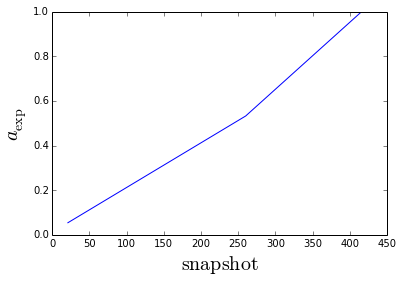

In [13]:
plot(data_points[:,1], data_points[:,2])

xlabel("${\mathrm{snapshot}}$", fontsize=20)
ylabel("$a_{\mathrm{exp}}$", fontsize=20)

In [47]:
sql_query="SELECT Mvir, Vcir, Rvir/conc, x, y, z FROM Bolshoi.BDMV WHERE snapnum=416 AND Mvir > 1.0E12 AND x < 30 AND y < 30 AND z < 30 ORDER BY Mvir desc"

In [48]:
job_id = CS.run_sql_query(query_string=sql_query)

Job created: 366231170364557


In [50]:
CS.check_job_status(jobid=job_id)

INFO:astropy:Job 366231170364557: COMPLETED


INFO: Job 366231170364557: COMPLETED [astroquery.cosmosim.core]


'COMPLETED'

In [51]:
data = CS.download(jobid=job_id,format='csv')

In [52]:
header = data[0]
data_points = array(data[1])
print header

['row_id', 'Mvir', 'Vcir', '_Rvir_/_conc_', 'x', 'y', 'z']


In [53]:
CS.download(jobid=job_id, filename='../data/Bolshoi_cube.csv',format='csv')

In [58]:
x=data_points[:,4]
y=data_points[:,5]
mass = data_points[:,1]
vcirc = data_points[:,2]

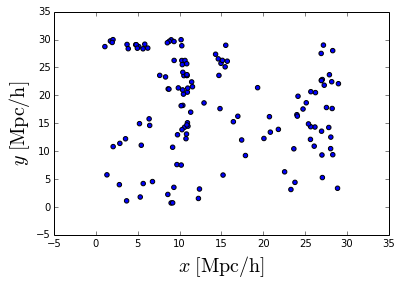

In [62]:
scatter(x,y)


xlabel("$x\ {\mathrm{[Mpc/h]}}$", fontsize=20)
ylabel("$y\ {\mathrm{[Mpc/h]}}$", fontsize=20)

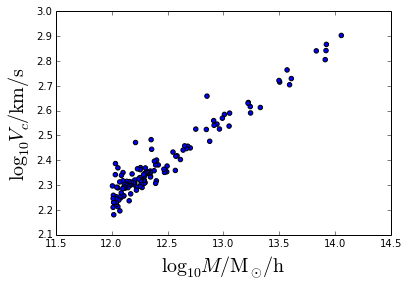

In [68]:
scatter(log10(mass), log10(vcirc))


xlabel("$\log_{10} M/{\mathrm{M_\odot/h}}$", fontsize=20)
ylabel("$\log_{10} V_{c}/{\mathrm{km/s}}$", fontsize=20)